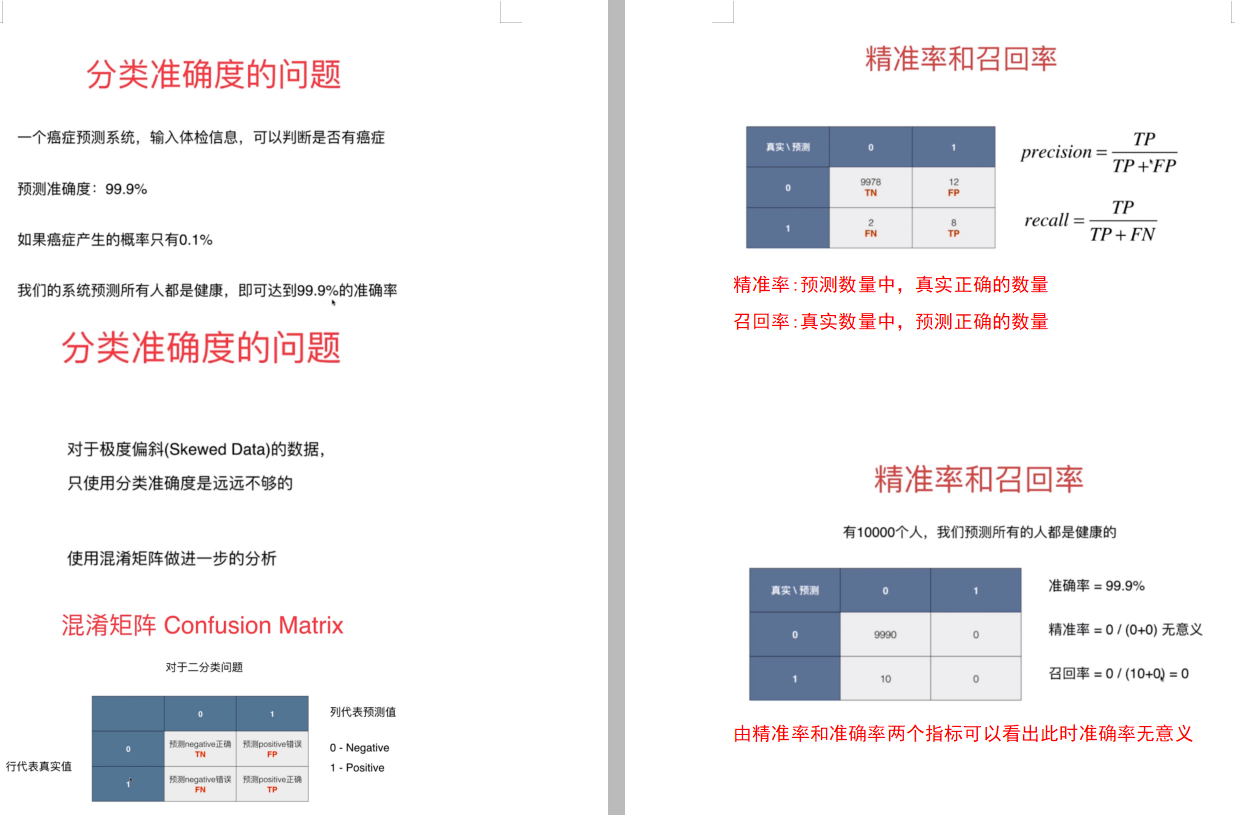

In [1]:
from IPython.display import Image
Image(filename=r"image/x1.png")

## 实现混淆矩阵、精准率和召回率

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [6]:
y_log_predict = log_reg.predict(X_test)

In [7]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
TN(y_test, y_log_predict)

403

In [8]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test, y_log_predict)

2

In [9]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test, y_log_predict)

9

In [10]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test, y_log_predict)

36

In [11]:
# 混淆矩阵
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict),FP(y_true, y_predict)],
        [FN(y_true, y_predict),TP(y_true, y_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [12]:
# 精准率
def precision_score(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tp = TP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
precision_score(y_test, y_log_predict)

0.9473684210526315

In [13]:
# 召回率
def recall_score(y_true, y_predict):
    fn = FN(y_true, y_predict)
    tp = TP(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.8

### sklearn中的混淆矩阵、精准率和召回率

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score
precision_score(y_test, y_log_predict)

0.9473684210526315

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test, y_log_predict)

0.8

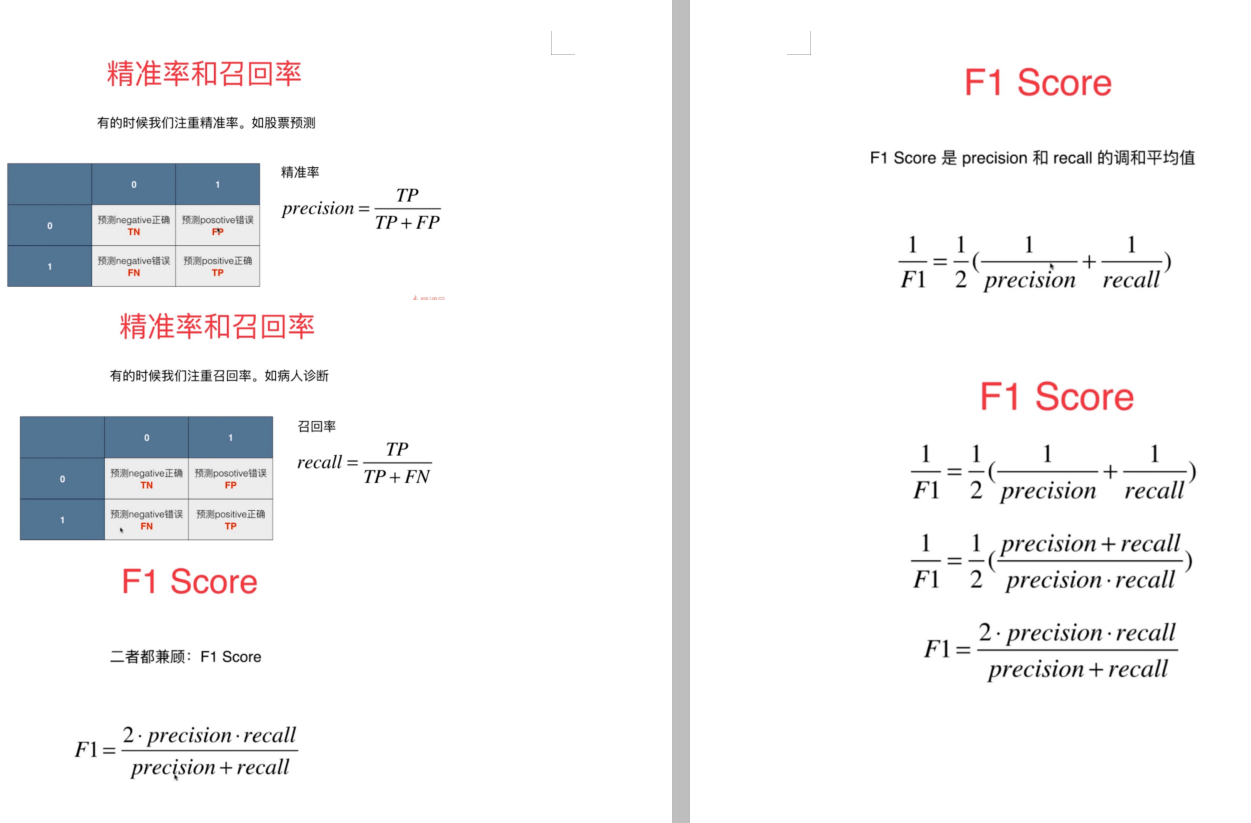

In [17]:
from IPython.display import Image
Image(filename=r"image/x2.png")

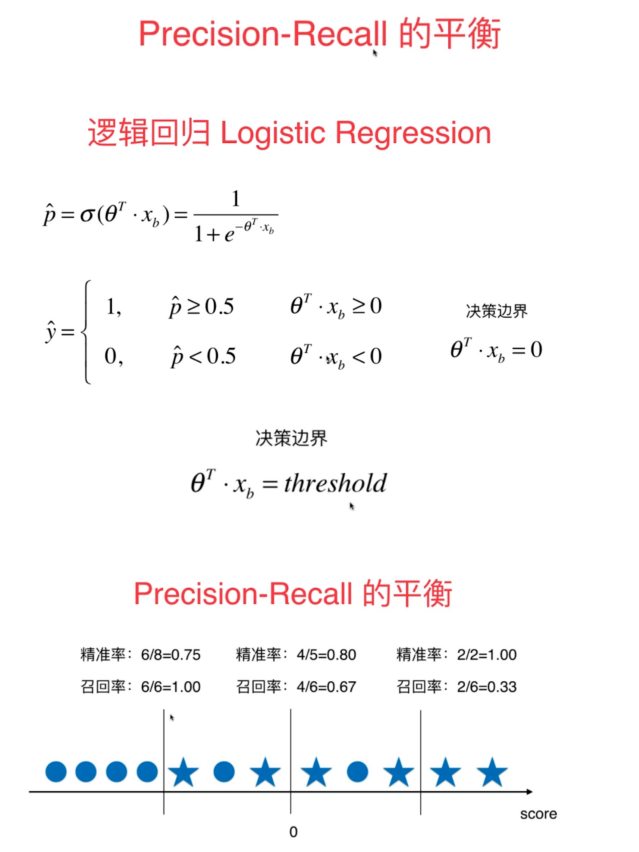

In [18]:
from IPython.display import Image
Image(filename=r"image/x3.png")

## F1 Score

In [19]:
import numpy as np

In [20]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [21]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [22]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [23]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

In [24]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [27]:
y_predict = log_reg.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.9473684210526315

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.8

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.8674698795180723

## 精准率和召回率的平衡

In [32]:
log_reg.decision_function(X_test)[:10]

array([-22.05705181, -33.02949573, -16.21340238, -80.37917009,
       -48.25125209, -24.54010044, -44.39166152, -25.04298784,
        -0.97831701, -19.71745321])

In [33]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
decision_scores = log_reg.decision_function(X_test)

In [35]:
np.min(decision_scores)

-85.68617092628044

In [36]:
np.max(decision_scores)

19.889573725637938

In [37]:
y_predict_2 = np.array(decision_scores >= 5, dtype = 'int')

In [38]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [39]:
precision_score(y_test, y_predict_2)

0.96

In [40]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [41]:
y_predict_3 = np.array(decision_scores >= -5, dtype = 'int')

In [42]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [43]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [44]:
recall_score(y_test, y_predict_3)

0.8888888888888888

## Precision-Recall-Curve

In [45]:
precisions = []
recalls = []

# min->max 步长0.1
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

In [46]:
plt.plot(thresholds, precisions, )
plt.plot(thresholds, recalls)

NameError: name 'plt' is not defined

### Precision-Recall 曲线

In [ ]:
plt.plot(precisions, recalls)
plt.xlabel('precision')
plt.ylabel('recall')

### sklearn中的Precision-Recall 曲线

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [ ]:
precisions.shape

In [ ]:
recalls.shape

In [ ]:
thresholds.shape

In [ ]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

In [ ]:
from IPython.display import Image
Image(filename=r"image/x4.png")

## ROC曲线

In [ ]:
%run C:\Learning\jupyter-notebook\ml\playML\metrics

In [ ]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype = 'int')
    tprs.append(TPR(y_test, y_predict))
    fprs.append(FPR(y_test, y_predict))

In [ ]:
plt.plot(fprs, tprs)

## sklearn中的ROC

In [ ]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

In [ ]:
plt.plot(fprs, tprs)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

## 多分类问题中的混淆矩阵

In [50]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9367176634214186

In [53]:
y_predict = log_reg.predict(X_test)

In [54]:
confusion_matrix(y_test, y_predict)

array([[146,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 137,   0,   0,   0,   1,   0,   0,   1,   1],
       [  1,   6, 126,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 140,   0,   2,   0,   2,   6,   0],
       [  0,   1,   0,   0, 143,   0,   0,   0,   0,   5],
       [  1,   0,   0,   1,   1, 138,   0,   0,   2,   4],
       [  1,   1,   0,   0,   1,   0, 140,   0,   1,   0],
       [  0,   1,   0,   0,   1,   0,   0, 131,   1,   4],
       [  2,   7,   4,   6,   0,   3,   2,   0, 116,   4],
       [  0,   1,   1,   3,   0,   1,   0,   1,   9, 130]], dtype=int64)

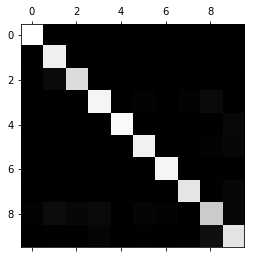

In [57]:
# 画出灰度值图
import matplotlib.pyplot as plt
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [58]:
# 除去对角线上
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00680272, 0.        , 0.        , 0.00694444, 0.00684932],
       [0.00684932, 0.04285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0075188 , 0.        , 0.        ,
        0.01360544, 0.        , 0.01449275, 0.04166667, 0.        ],
       [0.        , 0.00714286, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03424658],
       [0.00684932, 0.        , 0.        , 0.00662252, 0.00671141,
        0.        , 0.        , 0.        , 0.01388889, 0.02739726],
       [0.00684932, 0.00714286, 0.        , 0.        , 0.00671141,
        0.        , 0.        , 0.        , 0.00694444, 0.        ],
       [0.        , 0.00714286, 0.       

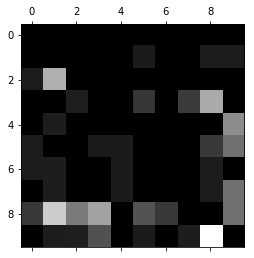

In [59]:
plt.matshow(err_matrix, cmap=plt.cm.gray)